In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
cd ..

/Share/home/shibinbin/projects/emaize


In [3]:
import GPy

In [4]:
X = np.random.uniform(-3.,3.,(20,1))
Y = np.sin(X) + np.random.randn(20,1)*0.05

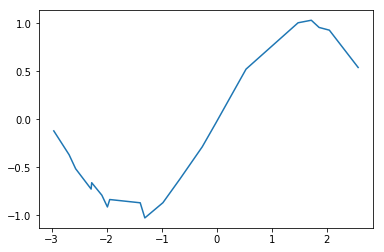

In [5]:
X_argsort = np.argsort(np.ravel(X))
plot(np.ravel(X)[X_argsort], np.ravel(Y)[X_argsort])

In [6]:
kernel = GPy.kern.RBF(input_dim=1, variance=1., lengthscale=1.)

In [7]:
kernel

rbf.,value,constraints,priors
variance,1.0,+ve,
lengthscale,1.0,+ve,


In [8]:
m = GPy.models.GPRegression(X,Y,kernel)

In [9]:
m

GP_regression.,value,constraints,priors
rbf.variance,1.0,+ve,
rbf.lengthscale,1.0,+ve,
Gaussian_noise.variance,1.0,+ve,


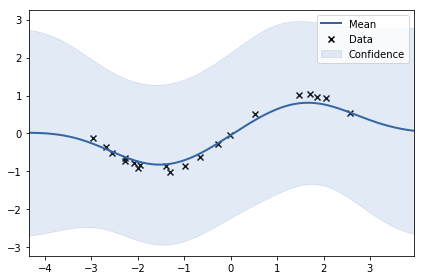

In [11]:
fig = m.plot()

In [12]:
m.optimize(messages=True)

Running L-BFGS-B (Scipy implementation) Code:
  runtime   i      f              |g|        
    00s00  0001   2.287209e+01   2.661364e+01 
    00s02  0008  -1.302828e+01   1.013338e+02 
    00s05  0016  -1.729670e+01   3.146991e-03 
    00s06  0020  -1.729707e+01   1.013191e-10 
Runtime:     00s06
Optimization status: Converged



In [13]:
m.optimize_restarts(num_restarts = 3)

Optimization restart 1/3, f = -17.297073542
Optimization restart 2/3, f = -17.2970735419
Optimization restart 3/3, f = -17.297073542


GP_regression.,value,constraints,priors
rbf.variance,1.27717497394,+ve,
rbf.lengthscale,1.97346505287,+ve,
Gaussian_noise.variance,0.0019326587582,+ve,


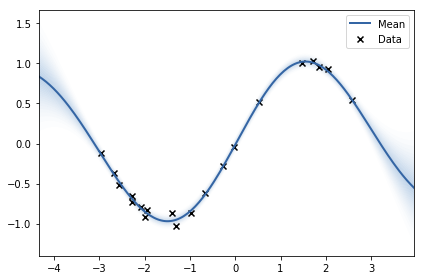

In [17]:
display(m)
fig = m.plot(plot_density=True)

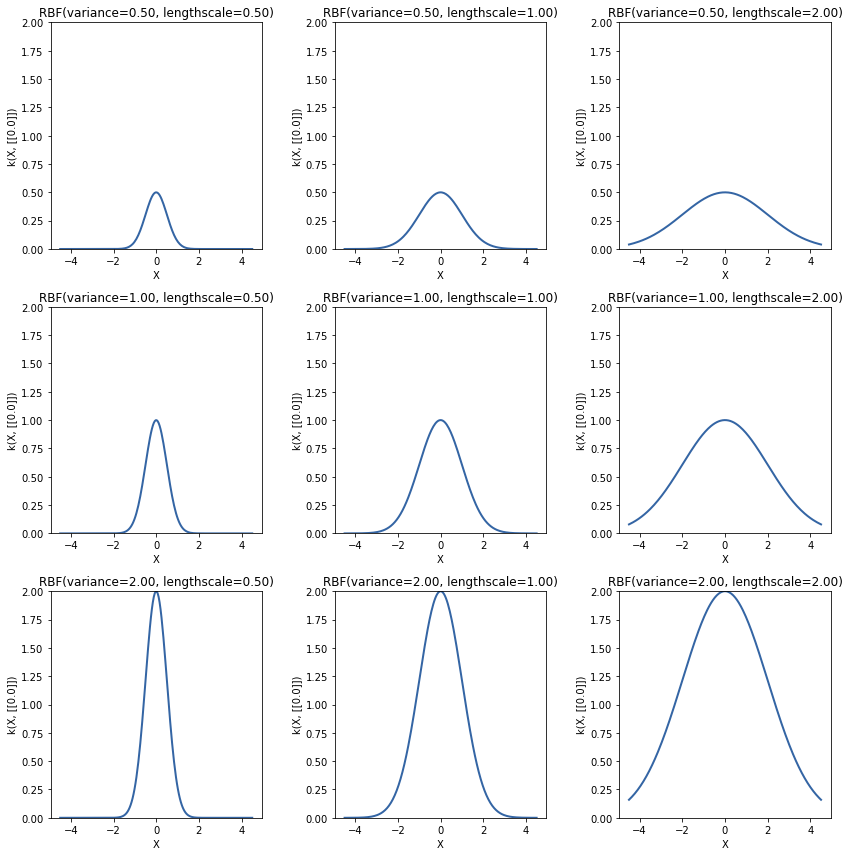

In [25]:
fig, axes = plt.subplots(3, 3, figsize=(12, 12))
for i, variance in enumerate((0.5, 1.0, 2.0)):
    for j, lengthscale in enumerate((0.5, 1.0, 2.0)):
        GPy.kern.RBF(input_dim=1, variance=variance, lengthscale=lengthscale).plot(ax=axes[i, j])
        axes[i, j].set_title('RBF(variance=%.2f, lengthscale=%.2f)'%(variance, lengthscale))
        axes[i, j].set_ylim(0, 2.0)
plt.tight_layout()

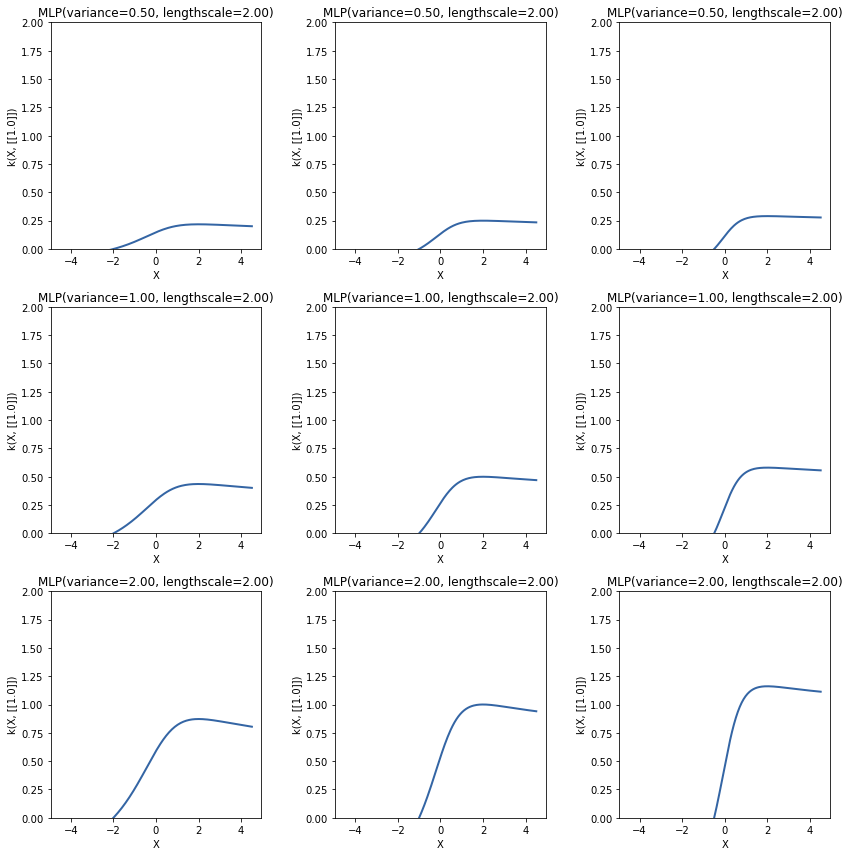

In [38]:
fig, axes = plt.subplots(3, 3, figsize=(12, 12))
for i, variance in enumerate((0.5, 1.0, 2.0)):
    for j, weight_variance in enumerate((0.5, 1.0, 2.0)):
        GPy.kern.MLP(input_dim=1, variance=variance, weight_variance=weight_variance).plot(ax=axes[i, j])
        axes[i, j].set_title('MLP(variance=%.2f, lengthscale=%.2f)'%(variance, lengthscale))
        axes[i, j].set_ylim(0, 2.0)
plt.tight_layout()

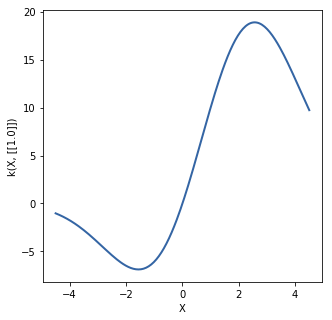

In [37]:
k1 = GPy.kern.RBF(input_dim=1, variance=1.0, lengthscale=lengthscale)
k2 = GPy.kern.Linear(input_dim=1, variances=10.0)
k = k1 * k2
fig, ax = plt.subplots(figsize=(5, 5))
k.plot(ax=ax)